In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('spain.csv')
df = df.dropna()

In [3]:
df['mother_has_secondary_education'].value_counts(normalize=True)

1.0    0.911703
0.0    0.088297
Name: mother_has_secondary_education, dtype: float64

<AxesSubplot:xlabel='mother_has_secondary_education', ylabel='score_math'>

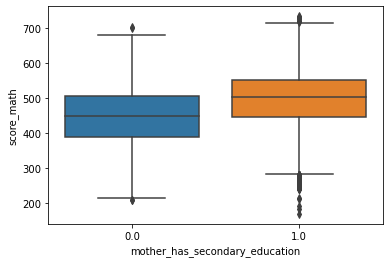

In [4]:
sns.boxplot(x="mother_has_secondary_education", y="score_math", data=df)

In [6]:
df['mother_has_college_education'].value_counts(normalize=True)

1.0    0.614996
0.0    0.385004
Name: mother_has_college_education, dtype: float64

<AxesSubplot:xlabel='mother_has_college_education', ylabel='score_math'>

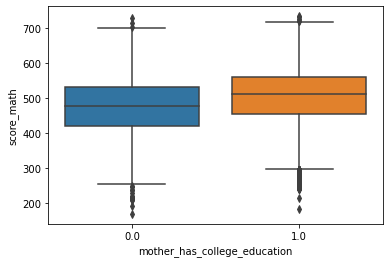

In [7]:
sns.boxplot(x="mother_has_college_education", y="score_math", data=df)

In [9]:
df['repeated_secondary'].value_counts(normalize=True)


No, never             0.803536
Yes, once             0.183101
Yes, twice or more    0.013363
Name: repeated_secondary, dtype: float64

<AxesSubplot:xlabel='repeated_secondary', ylabel='score_math'>

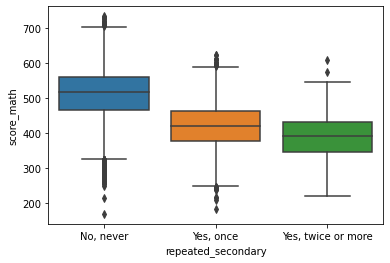

In [8]:
df['repeated_secondary'].value_counts(normalize=True)
sns.boxplot(x="repeated_secondary", y="score_math", data=df)

<AxesSubplot:xlabel='birth_month_name', ylabel='score_math'>

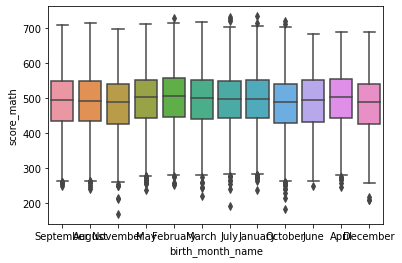

In [5]:
sns.boxplot(x="birth_month_name", y="score_math", data=df)

In [11]:
df['gender'].value_counts(normalize=True)


Male      0.500431
Female    0.499569
Name: gender, dtype: float64

<AxesSubplot:xlabel='gender', ylabel='score_math'>

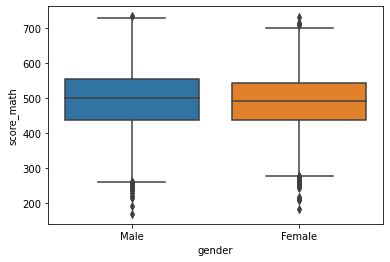

In [10]:
df['gender'].value_counts(normalize=True)
sns.boxplot(x="gender", y="score_math", data=df)

In [13]:
df['internet_connection'].value_counts(normalize=True)


Yes    0.979984
No     0.020016
Name: internet_connection, dtype: float64

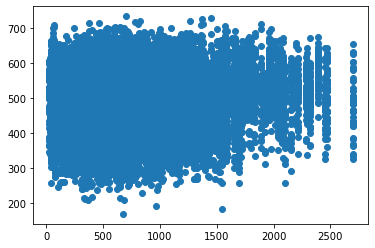

In [15]:
plt.scatter(df['n_students_in_school'], df['score_math'])

## Feature Selection

For now, we are going to use our common sense ;)

    - mother_has_college_education (categorical) - 2 options -> 1 column/feature
    - repeated_secondary (categorical) - 3 options -> 2 columns/features
    - n_students_in_school (continuous)

In [37]:
df['mother_has_college_education']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
35938    1.0
35939    1.0
35940    1.0
35941    1.0
35942    1.0
Name: mother_has_college_education, Length: 29656, dtype: float64

In [38]:
repeated_secodary_dummies = pd.get_dummies(df['repeated_secondary'])

In [39]:
dat = pd.concat([df, repeated_secodary_dummies], axis=1)
dat

,mother_has_secondary_education,mother_has_college_education,birth_month_num,birth_month_name,gender,internet_connection,repeated_secondary,score_math,n_students_in_school,"No, never","Yes, once","Yes, twice or more"
0,1.0,1.0,9,September,Male,Yes,"No, never",468.2330,75.0,1,0,0
1,1.0,1.0,8,August,Female,Yes,"No, never",539.3369,75.0,1,0,0
2,1.0,1.0,11,November,Female,Yes,"No, never",619.6046,75.0,1,0,0
3,1.0,1.0,5,May,Male,Yes,"No, never",406.1378,75.0,1,0,0
4,1.0,1.0,2,February,Female,Yes,"No, never",508.2389,75.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
35938,1.0,1.0,3,March,Female,Yes,"No, never",494.6956,153.0,1,0,0
35939,1.0,1.0,7,July,Female,Yes,"No, never",582.8701,153.0,1,0,0
35940,1.0,1.0,10,October,Female,Yes,"No, never",546.3091,153.0,1,0,0
35941,1.0,1.0,5,May,Male,Yes,"No, never",623.5066,153.0,1,0,0


In [50]:
pd.get_dummies(df['birth_month_num'])

,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
35938,0,0,1,0,0,0,0,0,0,0,0,0
35939,0,0,0,0,0,0,1,0,0,0,0,0
35940,0,0,0,0,0,0,0,0,0,1,0,0
35941,0,0,0,0,1,0,0,0,0,0,0,0


In [40]:
Y = dat['score_math']
Y

0        468.2330
1        539.3369
2        619.6046
3        406.1378
4        508.2389
           ...   
35938    494.6956
35939    582.8701
35940    546.3091
35941    623.5066
35942    597.9505
Name: score_math, Length: 29656, dtype: float64

In [41]:
X = dat[['mother_has_college_education','Yes, once','Yes, twice or more','n_students_in_school']]
X

,mother_has_college_education,"Yes, once","Yes, twice or more",n_students_in_school
0,1.0,0,0,75.0
1,1.0,0,0,75.0
2,1.0,0,0,75.0
3,1.0,0,0,75.0
4,1.0,0,0,75.0
...,...,...,...,...
35938,1.0,0,0,153.0
35939,1.0,0,0,153.0
35940,1.0,0,0,153.0
35941,1.0,0,0,153.0


## Cross Validation

This is to make sure that you are picking the model that doesn't overfit compared to the other baseline models.

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, shuffle=True)

## Train the Model

In [44]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [45]:
print('a is',lr.intercept_)
print('b is', lr.coef_)

a is 494.22608103553137
b is [ 1.56173741e+01 -8.84000664e+01 -1.17433679e+02  1.29242967e-02]


## Loss Function

In [46]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, lr.predict(X_test))

4495.387157451516

In [47]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, lr.predict(X_test))

53.72980930563202

In [48]:
Y.describe()

count    29656.000000
mean       496.473648
std         77.245833
min        169.983900
25%        444.335450
50%        501.605600
75%        552.558325
max        732.961000
Name: score_math, dtype: float64